In this competition, you will be predicting the degradation rates at various locations along RNA sequence.

There are multiple ground truth values provided in the training data. While the submission format requires all 5 to be predicted, only the following are scored: reactivity, deg_Mg_pH10, and deg_Mg_50C.

### Columns

id - An arbitrary identifier for each sample.

seq_scored - (68 in Train and Public Test, 91 in Private Test) Integer value denoting the number of positions used in scoring with predicted values. This should match the length of reactivity, deg_* and *_error_* columns. Note that molecules used for the Private Test will be longer than those in the Train and Public Test data, so the size of this vector will be different.

seq_length - (107 in Train and Public Test, 130 in Private Test) Integer values, denotes the length of sequence. Note that molecules used for the Private Test will be longer than those in the Train and Public Test data, so the size of this vector will be different.

sequence - (1x107 string in Train and Public Test, 130 in Private Test) Describes the RNA sequence, a combination of A, G, U, and C for each sample. Should be 107 characters long, and the first 68 bases should correspond to the 68 positions specified in seq_scored (note: indexed starting at 0).

structure - (1x107 string in Train and Public Test, 130 in Private Test) An array of (, ), and . characters that describe whether a base is estimated to be paired or unpaired. Paired bases are denoted by opening and closing parentheses e.g. (....) means that base 0 is paired to base 5, and bases 1-4 are unpaired.

reactivity - (1x68 vector in Train and Public Test, 1x91 in Private Test) An array of floating point numbers, should have the same length as seq_scored. These numbers are reactivity values for the first 68 bases as denoted in sequence, and used to determine the likely secondary structure of the RNA sample.

deg_pH10 - (1x68 vector in Train and Public Test, 1x91 in Private Test) An array of floating point numbers, should have the same length as seq_scored. These numbers are reactivity values for the first 68 bases as denoted in sequence, and used to determine the likelihood of degradation at the base/linkage after incubating without magnesium at high pH (pH 10).

deg_Mg_pH10 - (1x68 vector in Train and Public Test, 1x91 in Private Test) An array of floating point numbers, should have the same length as seq_scored. These numbers are reactivity values for the first 68 bases as denoted in sequence, and used to determine the likelihood of degradation at the base/linkage after incubating with magnesium in high pH (pH 10).

deg_50C - (1x68 vector in Train and Public Test, 1x91 in Private Test) An array of floating point numbers, should have the same length as seq_scored. These numbers are reactivity values for the first 68 bases as denoted in sequence, and used to determine the likelihood of degradation at the base/linkage after incubating without magnesium at high temperature (50 degrees Celsius).

deg_Mg_50C - (1x68 vector in Train and Public Test, 1x91 in Private Test) An array of floating point numbers, should have the same length as seq_scored. These numbers are reactivity values for the first 68 bases as denoted in sequence, and used to determine the likelihood of degradation at the base/linkage after incubating with magnesium at high temperature (50 degrees Celsius).

*_error_* - An array of floating point numbers, should have the same length as the corresponding reactivity or deg_* columns, calculated errors in experimental values obtained in reactivity and deg_* columns.

predicted_loop_type - (1x107 string) Describes the structural context (also referred to as 'loop type')of each character in sequence. Loop types assigned by bpRNA from Vienna RNAfold 2 structure. From the bpRNA_documentation: S: paired "Stem" M: Multiloop I: Internal loop B: Bulge H: Hairpin loop E: dangling End X: eXternal loop

S/N filter Indicates if the sample passed filters described below in Additional Notes.

### Additional Notes


At the beginning of the competition, Stanford scientists have data on 3029 RNA sequences of length 107. For technical reasons, measurements cannot be carried out on the final bases of these RNA sequences, so we have experimental data (ground truth) in 5 conditions for the first 68 bases.

We have split out 629 of these 3029 sequences for a public test set to allow for continuous evaluation through the competition, on the public leaderboard. These sequences, in *test.json*, have been additionally filtered based on three criteria detailed below to ensure that this subset is not dominated by any large cluster of RNA molecules with poor data, which might bias the public leaderboard. The remaining 2400 sequences for which we have data are in *train.json*.

For our final and most important scoring (the Private Leaderbooard), Stanford scientists are carrying out measurements on 3005 new RNAs, which have somewhat longer lengths of 130 bases. For these data, we expect to have measurements for the first 91 bases, again missing the ends of the RNA. These sequences constitute another 3005 of the 3634 sequences in test.json.


For those interested in how the 629 107-base sequences in *test.json* were filtered, here were the steps to ensure a diverse and high quality test set for public leaderboard scoring:

Minimum value across all 5 conditions must be greater than -0.5.

Mean signal/noise across all 5 conditions must be greater than 1.0. {Signal/noise is defined as mean( measurement value over 68 nts )/mean( statistical error in measurement value over 68 nts)}

To help ensure sequence diversity, the resulting sequences were clustered into clusters with less than 50% sequence similarity, and the 629 test set sequences were chosen from clusters with 3 or fewer members. That is, any sequence in the test set should be sequence similar to at most 2 other sequences.

Note that these filters have not been applied to the 2400 RNAs in the public training data train.json — some of those measurements have negative values or poor signal-to-noise, or some RNA sequences have near-identical sequences in that set. But we are providing all those data in case competitors can squeeze out more signal.

~~The three filters noted above will also not be applied to Private Test on 3005 sequences.~~

[Update as of 18 Sep 2020] After discussion, the three filters noted above will be applied to Private Test on 3005 sequences, and predictions on sequences that do not pass the filters will not be included in scoring.

In [11]:
# Dictionnary linking the column names and their definition for easier comprehension
DictColumns={'id' : 'An arbitrary identifier for each sample.' ,
             'sequence' : '(1x107 string in Train and Public Test, 130 in Private Test) Describes the RNA sequence, a combination of A, G, U, and C for each sample. Should be 107 characters long, and the first 68 bases should correspond to the 68 positions specified in seq_scored (note: indexed starting at 0)',
             'structure' : '(1x107 string in Train and Public Test, 130 in Private Test) An array of (, ), and . characters that describe whether a base is estimated to be paired or unpaired. Paired bases are denoted by opening and closing parentheses e.g. (....) means that base 0 is paired to base 5, and bases 1-4 are unpaired', 
             'predicted_loop_type' : '(1x107 string) Describes the structural context (also referred to as loop type) of each character in sequence. Loop types assigned by bpRNA from Vienna RNAfold 2 structure. From the bpRNA_documentation: S: paired "Stem" M: Multiloop I: Internal loop B: Bulge H: Hairpin loop E: dangling End X: eXternal loop', 
             'signal_to_noise' : 'S/N' ,
             'SN_filter' : 'Indicates if the sample passed filters described below in Additional Notes.', 
             'seq_length' : '(107 in Train and Public Test, 130 in Private Test) Integer values, denotes the length of sequence. Note that molecules used for the Private Test will be longer than those in the Train and Public Test data, so the size of this vector will be different.', 
             'seq_scored' : '(68 in Train and Public Test, 91 in Private Test) Integer value denoting the number of positions used in scoring with predicted values. This should match the length of reactivity, deg_* and *_error_* columns. Note that molecules used for the Private Test will be longer than those in the Train and Public Test data, so the size of this vector will be different.', 
             'reactivity_error' : 'see reactivity',
             'deg_error_Mg_pH10' : 'Error on the measured value', 
             'deg_error_pH10' : 'Error on the measured value',
             'deg_error_Mg_50C' : 'Error on the measured value',
             'deg_error_50C' : 'Error on the measured value', 
             'reactivity' : '(1x68 vector in Train and Public Test, 1x91 in Private Test) An array of floating point numbers, should have the same length as seq_scored. These numbers are reactivity values for the first 68 bases as denoted in sequence, and used to determine the likely secondary structure of the RNA sample', 
             'deg_Mg_pH10' : '(1x68 vector in Train and Public Test, 1x91 in Private Test) An array of floating point numbers, should have the same length as seq_scored. These numbers are reactivity values for the first 68 bases as denoted in sequence, and used to determine the likelihood of degradation at the base/linkage after incubating with magnesium in high pH (pH 10)', 
             'deg_pH10' : '(1x68 vector in Train and Public Test, 1x91 in Private Test) An array of floating point numbers, should have the same length as seq_scored. These numbers are reactivity values for the first 68 bases as denoted in sequence, and used to determine the likelihood of degradation at the base/linkage after incubating without magnesium at high pH (pH 10)', 
             'deg_Mg_50C' : '(1x68 vector in Train and Public Test, 1x91 in Private Test) An array of floating point numbers, should have the same length as seq_scored. These numbers are reactivity values for the first 68 bases as denoted in sequence, and used to determine the likelihood of degradation at the base/linkage after incubating with magnesium at high temperature (50 degrees Celsius).',
             'deg_50C' : '(1x68 vector in Train and Public Test, 1x91 in Private Test) An array of floating point numbers, should have the same length as seq_scored. These numbers are reactivity values for the first 68 bases as denoted in sequence, and used to determine the likelihood of degradation at the base/linkage after incubating without magnesium at high temperature (50 degrees Celsius).'}

In [12]:
# test
DictColumns['deg_50C']

'(1x68 vector in Train and Public Test, 1x91 in Private Test) An array of floating point numbers, should have the same length as seq_scored. These numbers are reactivity values for the first 68 bases as denoted in sequence, and used to determine the likelihood of degradation at the base/linkage after incubating without magnesium at high temperature (50 degrees Celsius).'

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import models
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical

# Mise en forme des données

In [14]:
train_df = pd.read_json('train.json',  lines = True).drop(['index'], axis = 1)
test_df = pd.read_json('test.json', lines = True).drop(['index'], axis = 1)

In [15]:
len(test_df)

3634

In [16]:
list(test_df.columns)

['id',
 'sequence',
 'structure',
 'predicted_loop_type',
 'seq_length',
 'seq_scored']

In [17]:
test_df.groupby("seq_length").size()

seq_length
107     629
130    3005
dtype: int64

In [18]:
train_df.head(3)

,id,sequence,structure,predicted_loop_type,signal_to_noise,SN_filter,seq_length,seq_scored,reactivity_error,deg_error_Mg_pH10,deg_error_pH10,deg_error_Mg_50C,deg_error_50C,reactivity,deg_Mg_pH10,deg_pH10,deg_Mg_50C,deg_50C
0,id_001f94081,GGAAAAGCUCUAAUAACAGGAGACUAGGACUACGUAUUUCUAGGUA...,.....((((((.......)))).)).((.....((..((((((......,EEEEESSSSSSHHHHHHHSSSSBSSXSSIIIIISSIISSSSSSHHH...,6.894,1,107,68,"[0.1359, 0.20700000000000002, 0.1633, 0.1452, ...","[0.26130000000000003, 0.38420000000000004, 0.1...","[0.2631, 0.28600000000000003, 0.0964, 0.1574, ...","[0.1501, 0.275, 0.0947, 0.18660000000000002, 0...","[0.2167, 0.34750000000000003, 0.188, 0.2124, 0...","[0.3297, 1.5693000000000001, 1.1227, 0.8686, 0...","[0.7556, 2.983, 0.2526, 1.3789, 0.637600000000...","[2.3375, 3.5060000000000002, 0.3008, 1.0108, 0...","[0.35810000000000003, 2.9683, 0.2589, 1.4552, ...","[0.6382, 3.4773, 0.9988, 1.3228, 0.78770000000..."
1,id_0049f53ba,GGAAAAAGCGCGCGCGGUUAGCGCGCGCUUUUGCGCGCGCUGUACC...,.....(((((((((((((((((((((((....)))))))))).)))...,EEEEESSSSSSSSSSSSSSSSSSSSSSSHHHHSSSSSSSSSSBSSS...,0.193,0,107,68,"[2.8272, 2.8272, 2.8272, 4.7343, 2.5676, 2.567...","[73705.3985, 73705.3985, 73705.3985, 73705.398...","[10.1986, 9.2418, 5.0933, 5.0933, 5.0933, 5.09...","[16.6174, 13.868, 8.1968, 8.1968, 8.1968, 8.19...","[15.4857, 7.9596, 13.3957, 5.8777, 5.8777, 5.8...","[0.0, 0.0, 0.0, 2.2965, 0.0, 0.0, 0.0, 0.0, 0....","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[4.947, 4.4523, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[4.8511, 4.0426, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[7.6692, 0.0, 10.9561, 0.0, 0.0, 0.0, 0.0, 0.0..."
2,id_006f36f57,GGAAAGUGCUCAGAUAAGCUAAGCUCGAAUAGCAAUCGAAUAGAAU...,.....((((.((.....((((.(((.....)))..((((......)...,EEEEESSSSISSIIIIISSSSMSSSHHHHHSSSMMSSSSHHHHHHS...,8.800,1,107,68,"[0.0931, 0.13290000000000002, 0.11280000000000...","[0.1365, 0.2237, 0.1812, 0.1333, 0.1148, 0.160...","[0.17020000000000002, 0.178, 0.111, 0.091, 0.0...","[0.1033, 0.1464, 0.1126, 0.09620000000000001, ...","[0.14980000000000002, 0.1761, 0.1517, 0.116700...","[0.44820000000000004, 1.4822, 1.1819, 0.743400...","[0.2504, 1.4021, 0.9804, 0.49670000000000003, ...","[2.243, 2.9361, 1.0553, 0.721, 0.6396000000000...","[0.5163, 1.6823000000000001, 1.0426, 0.7902, 0...","[0.9501000000000001, 1.7974999999999999, 1.499..."


## Visualisation

In [19]:
deg_pH10_df=train_df.deg_pH10.str[0]

2.0051375833333336
2.03145


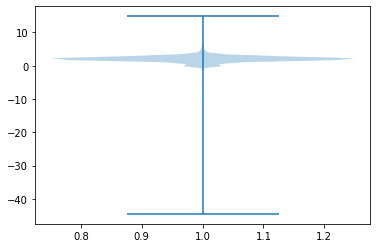

2.9236005833333336
2.88565


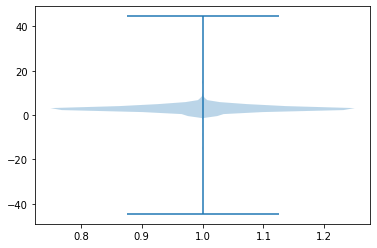

0.9287797083333333
0.98455


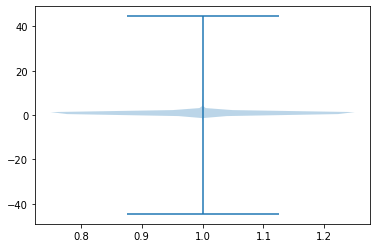

0.7225458333333333
0.7016500000000001


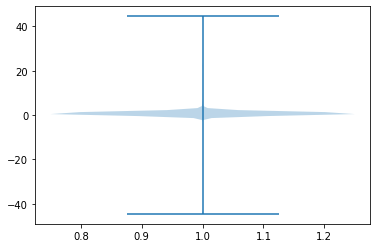

0.740868125
0.6605000000000001


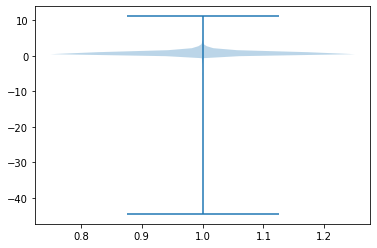

0.6808985416666666
0.6056


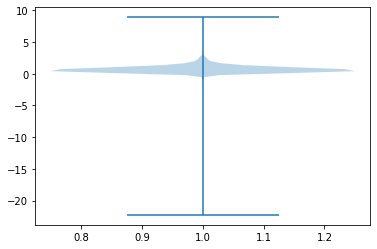

0.5717465833333334
0.46645000000000003


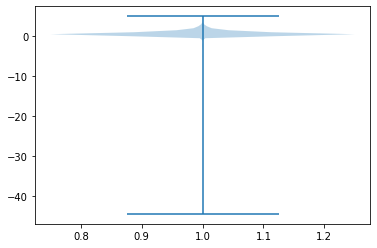

0.46109583333333326
0.3763


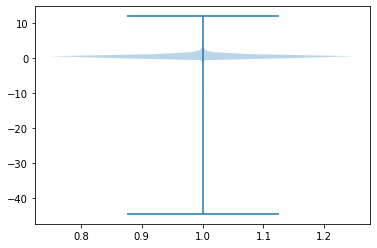

0.45230708333333336
0.34935000000000005


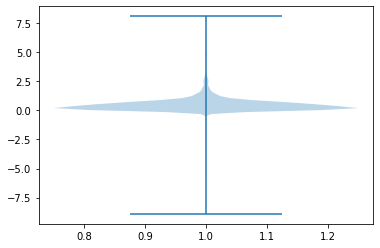

0.409444625
0.27140000000000003


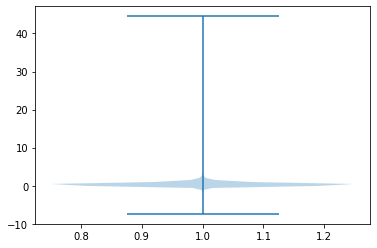

0.3547436666666667
0.2474


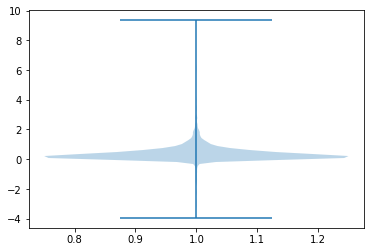

0.35730850000000003
0.2533


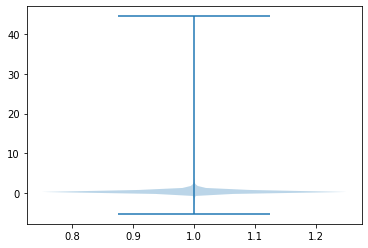

0.3438815
0.24615


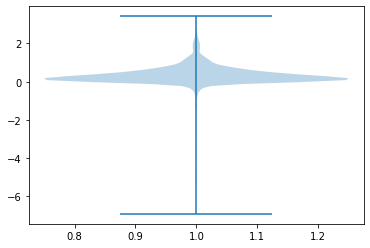

0.3401706666666666
0.24580000000000002


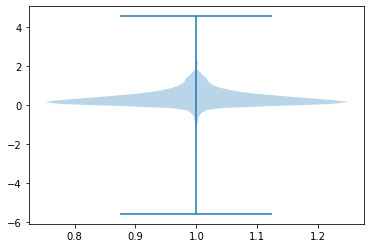

0.3336674583333333
0.26275000000000004


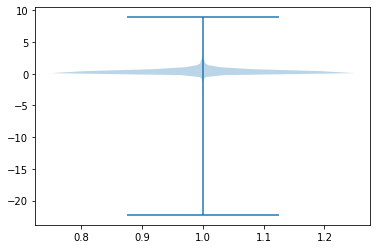

0.34212583333333335
0.2364


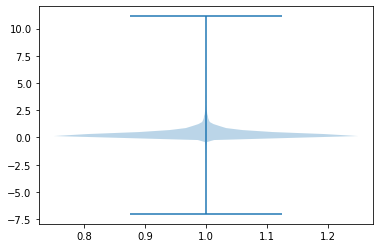

0.317651
0.2177


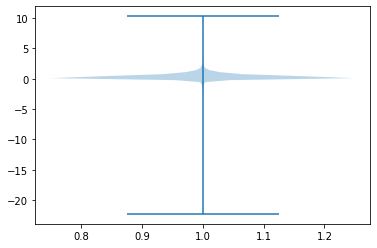

0.31401341666666666
0.24375000000000002


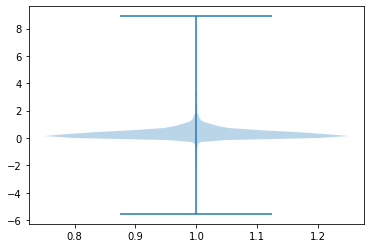

0.2801406666666667
0.21765


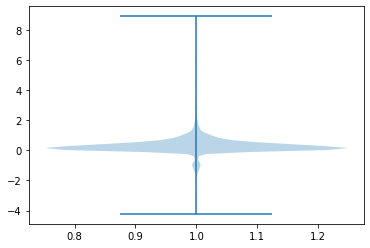

0.23409100000000005
0.21230000000000002


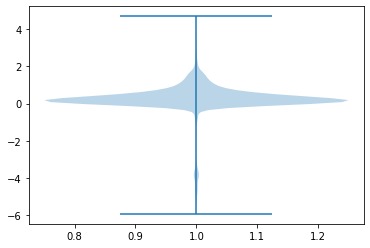

0.29663608333333336
0.20275


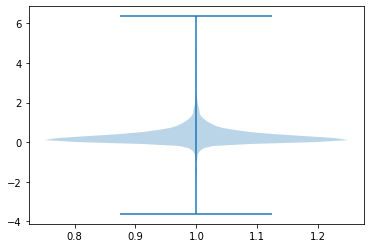

0.2715289166666667
0.196


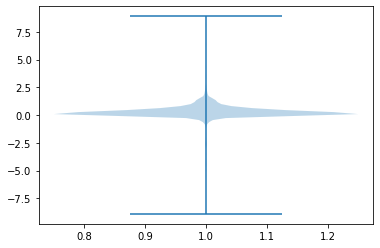

0.2676004583333333
0.20305


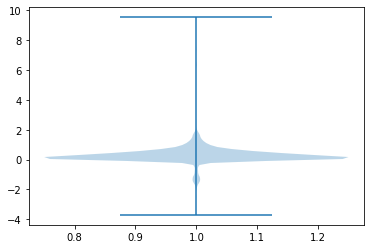

0.30177316666666665
0.22560000000000002


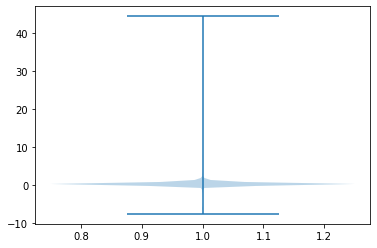

0.3187317083333333
0.2244


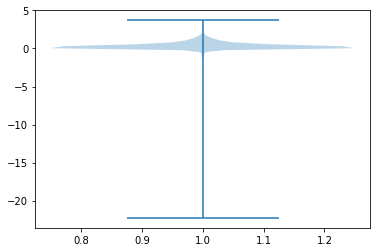

0.3303957916666667
0.23955


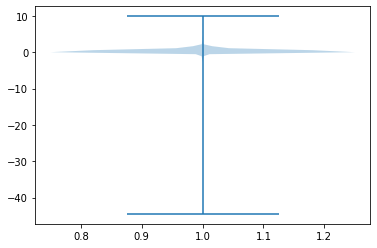

0.3104022083333334
0.24635


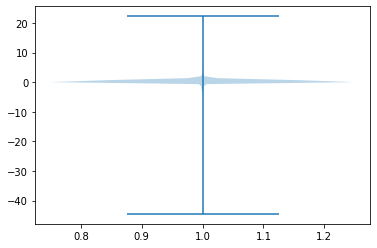

0.2830082916666667
0.23600000000000002


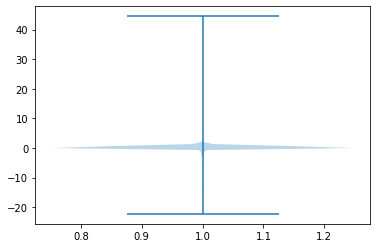

0.3318035416666667
0.23725000000000002


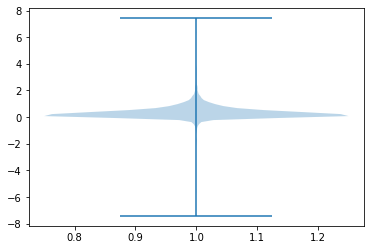

0.27904175
0.20375


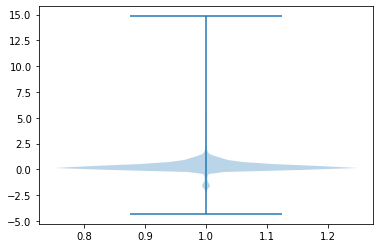

0.23371008333333332
0.17815


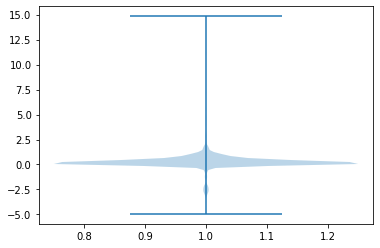

0.27815524999999997
0.16310000000000002


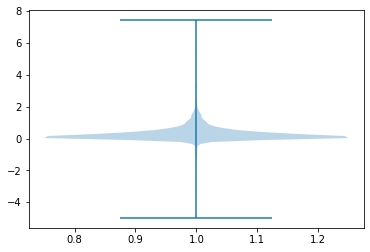

0.3251481666666667
0.20675000000000002


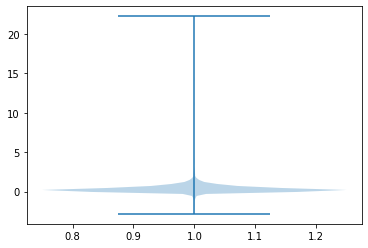

0.32514929166666673
0.19985000000000003


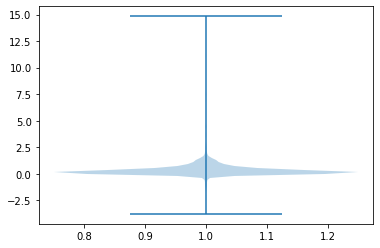

0.31979516666666663
0.21915


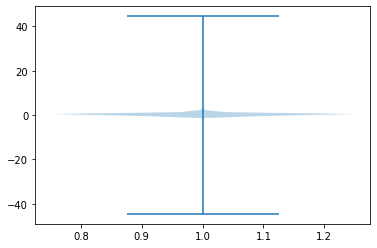

0.31405133333333335
0.22660000000000002


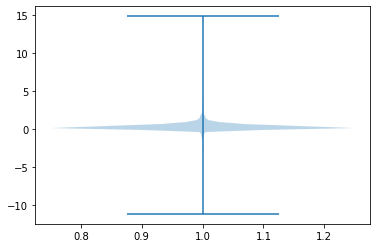

0.33486479166666666
0.22690000000000002


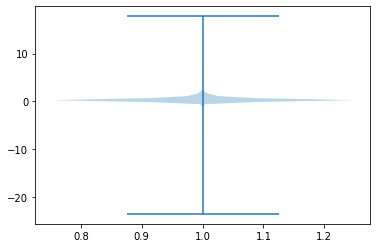

0.3449335416666666
0.2386


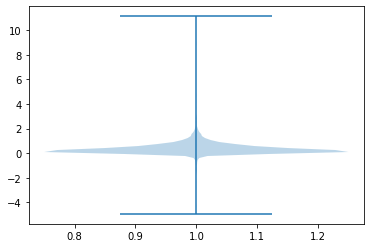

0.32670262499999997
0.2149


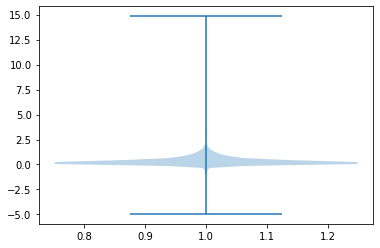

0.35017208333333333
0.2003


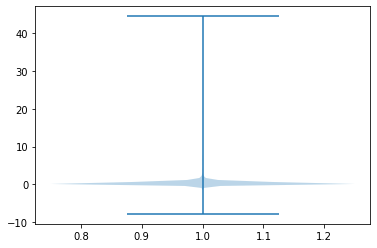

0.295207125
0.19235000000000002


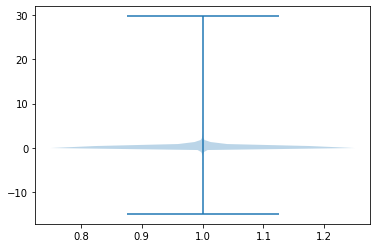

0.264485
0.1837


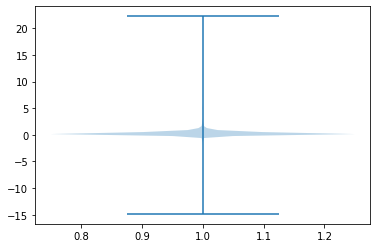

0.2732260416666667
0.1751


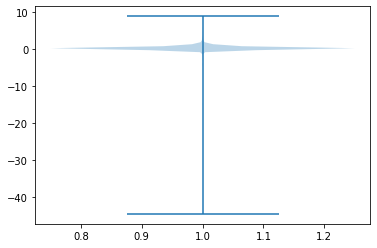

0.29867354166666665
0.2046


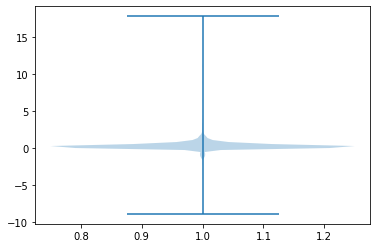

0.35121979166666667
0.2185


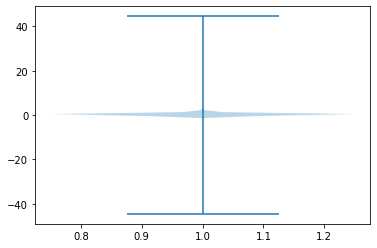

0.35543162500000003
0.22215000000000001


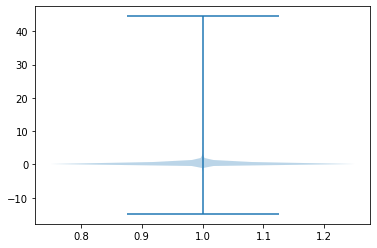

0.36915525000000005
0.2217


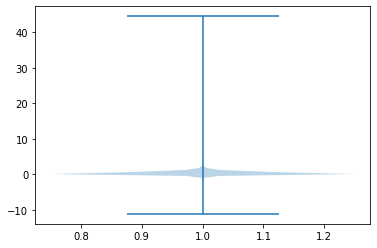

0.27903354166666666
0.2091


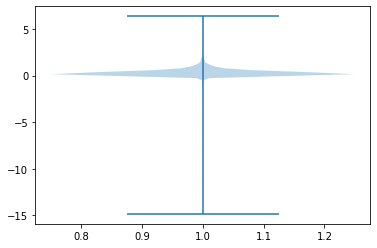

0.25524525000000003
0.1942


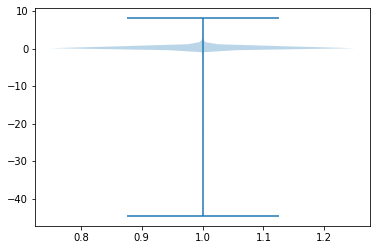

0.33864037500000005
0.2071


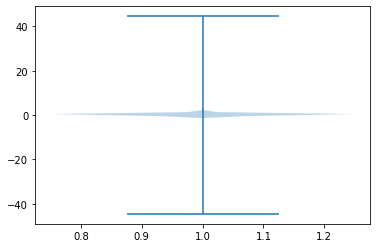

0.32741091666666666
0.21660000000000001


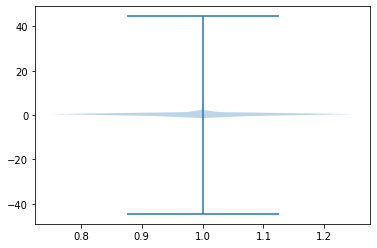

0.29608887500000003
0.20879999999999999


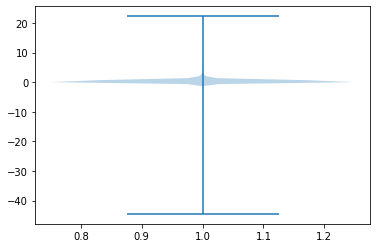

0.4003862916666667
0.2652


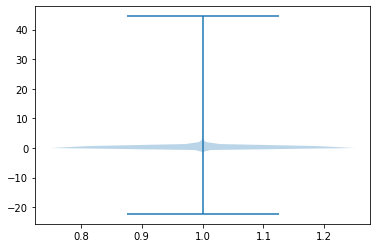

0.46969750000000005
0.26055


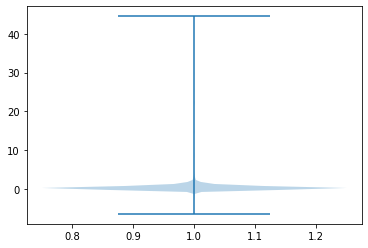

0.4056948333333334
0.24155000000000001


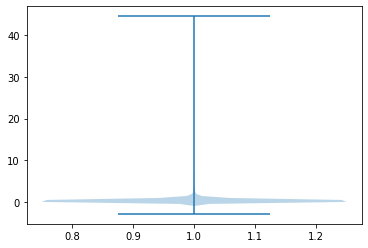

0.4580015833333334
0.26495


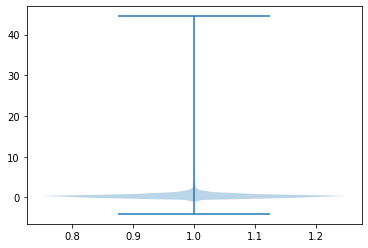

0.3925675416666667
0.25695


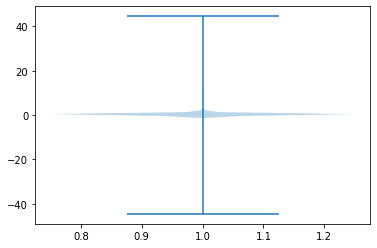

0.38784124999999997
0.27345


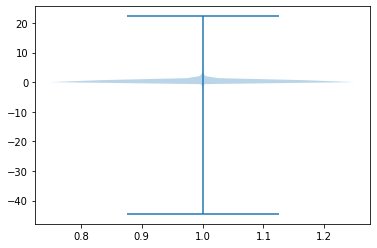

0.40729966666666667
0.28195000000000003


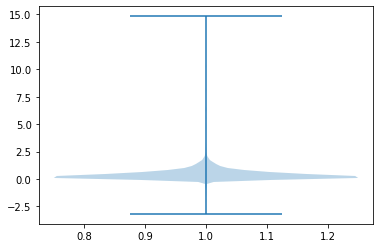

0.3945592083333333
0.26839999999999997


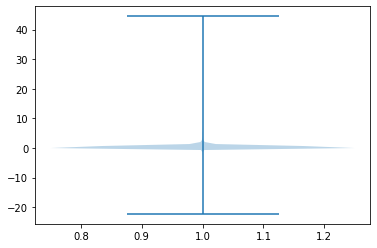

0.457729625
0.28


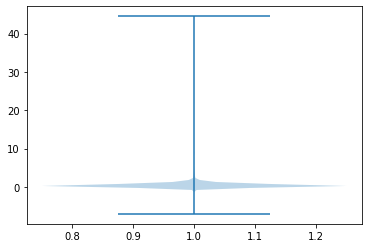

0.4221392083333334
0.2669


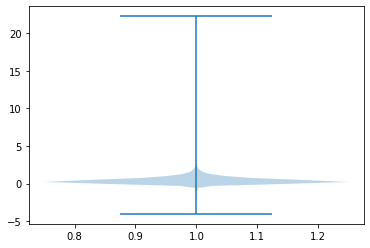

0.4322542499999999
0.26885000000000003


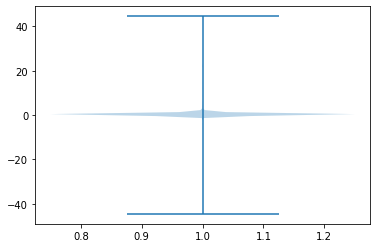

0.4679987083333333
0.2879


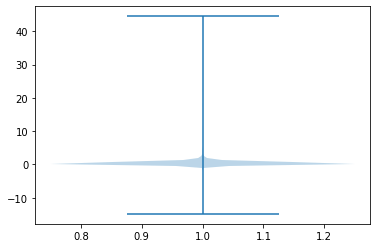

0.4689210000000001
0.33985


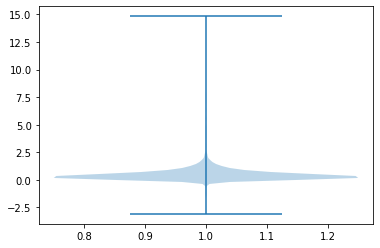

0.4678462500000001
0.35325


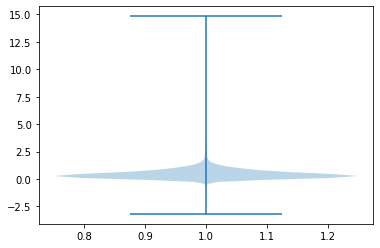

0.4535455
0.3449


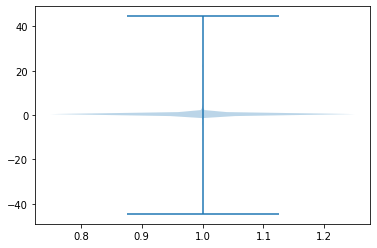

0.9418396666666669
0.7243


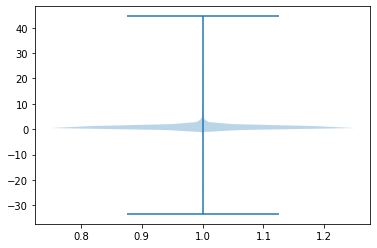

In [20]:
for i in range(68):
    deg_pH10_df=train_df.deg_pH10.str[i]
    print(deg_pH10_df.mean())
    print(deg_pH10_df.median())
    plt.violinplot(deg_pH10_df)
    plt.show()

## Matrices de corrélation

### Corrélation entre les dégradations

In [21]:
def item_mean(value_list):
    return np.mean(value_list)

In [22]:
# préparation des colonnes
to_name=['deg_pH10_mean','deg_Mg_pH10_mean','deg_50C_mean','deg_Mg_50C_mean','reactivity_mean']
from_name=[ 'deg_pH10', 'deg_Mg_pH10','deg_50C', 'deg_Mg_50C','reactivity']
for i in range(5):
    to_n=to_name[i]
    from_n=from_name[i]
    print(to_n,from_n)
    train_df[to_n]=train_df[from_n].apply(item_mean)


deg_pH10_mean deg_pH10
deg_Mg_pH10_mean deg_Mg_pH10
deg_50C_mean deg_50C
deg_Mg_50C_mean deg_Mg_50C
reactivity_mean reactivity


In [23]:
train_mean_df=train_df[{'deg_pH10_mean','deg_Mg_pH10_mean','deg_50C_mean','deg_Mg_50C_mean','reactivity_mean'}]

In [24]:
train_mean_df.head(3)

,deg_Mg_pH10_mean,deg_Mg_50C_mean,deg_pH10_mean,reactivity_mean,deg_50C_mean
0,0.559628,0.538540,0.503501,0.502631,0.585893
1,0.698354,0.930103,0.846041,0.411401,0.865125
2,0.578362,0.570284,0.548174,0.433966,0.575172


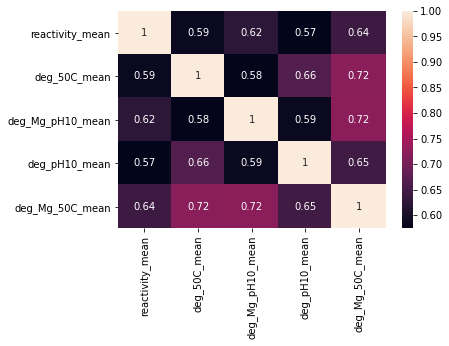

In [17]:
corrMatrix = train_mean_df.corr()

sn.heatmap(corrMatrix, annot=True)
plt.show()

### Corrélation entre les bases

In [25]:
name='deg_pH10'
i=0
np.mean(train_df[name].str[0])

2.0051375833333336

In [26]:
def mean_on_item_column(column,i):
    values=column.str[i]
#     print(values)
    return np.mean(values)

In [27]:
# préparation des colonnes
from_name=[ 'deg_pH10', 'deg_Mg_pH10','deg_50C', 'deg_Mg_50C','reactivity']
parameters_for_each_base=pd.DataFrame(0, index=from_name, columns=list(range(68)))
print(parameters_for_each_base)
for i in range (68):
    for name in from_name:
        parameters_for_each_base.loc[name,i]=mean_on_item_column(train_df[name],i)
        
parameters_for_each_base

             0   1   2   3   4   5   6   7   8   9   ...  58  59  60  61  62  \
deg_pH10      0   0   0   0   0   0   0   0   0   0  ...   0   0   0   0   0   
deg_Mg_pH10   0   0   0   0   0   0   0   0   0   0  ...   0   0   0   0   0   
deg_50C       0   0   0   0   0   0   0   0   0   0  ...   0   0   0   0   0   
deg_Mg_50C    0   0   0   0   0   0   0   0   0   0  ...   0   0   0   0   0   
reactivity    0   0   0   0   0   0   0   0   0   0  ...   0   0   0   0   0   

             63  64  65  66  67  
deg_pH10      0   0   0   0   0  
deg_Mg_pH10   0   0   0   0   0  
deg_50C       0   0   0   0   0  
deg_Mg_50C    0   0   0   0   0  
reactivity    0   0   0   0   0  

[5 rows x 68 columns]


,0,1,2,3,4,5,6,7,8,9,...,58,59,60,61,62,63,64,65,66,67
deg_pH10,2.005138,2.923601,0.928780,0.722546,0.740868,0.680899,0.571747,0.461096,0.452307,0.409445,...,0.407300,0.394559,0.457730,0.422139,0.432254,0.467999,0.468921,0.467846,0.453545,0.941840
deg_Mg_pH10,0.594784,2.089024,0.722305,0.550928,0.695129,0.589534,0.515086,0.411426,0.428095,0.368775,...,0.437803,0.395689,0.446379,0.426576,0.419822,0.516840,0.597314,0.577760,0.498237,0.673022
deg_50C,0.612250,1.803313,1.019534,0.765357,0.746606,0.627279,0.562147,0.481785,0.484335,0.433881,...,0.393853,0.349833,0.360787,0.377142,0.391510,0.421597,0.458241,0.533046,0.462601,0.598597
deg_Mg_50C,0.476655,2.033298,0.962429,0.747399,0.856011,0.623050,0.511681,0.432986,0.449736,0.354612,...,0.369458,0.355625,0.385201,0.357709,0.368206,0.480367,0.563445,0.573512,0.501915,0.469470
reactivity,0.536378,1.513710,1.124513,0.833669,0.672602,0.458567,0.360533,0.298208,0.292377,0.293193,...,0.320005,0.305114,0.299979,0.306304,0.311137,0.303148,0.334632,0.403904,0.360276,0.324275


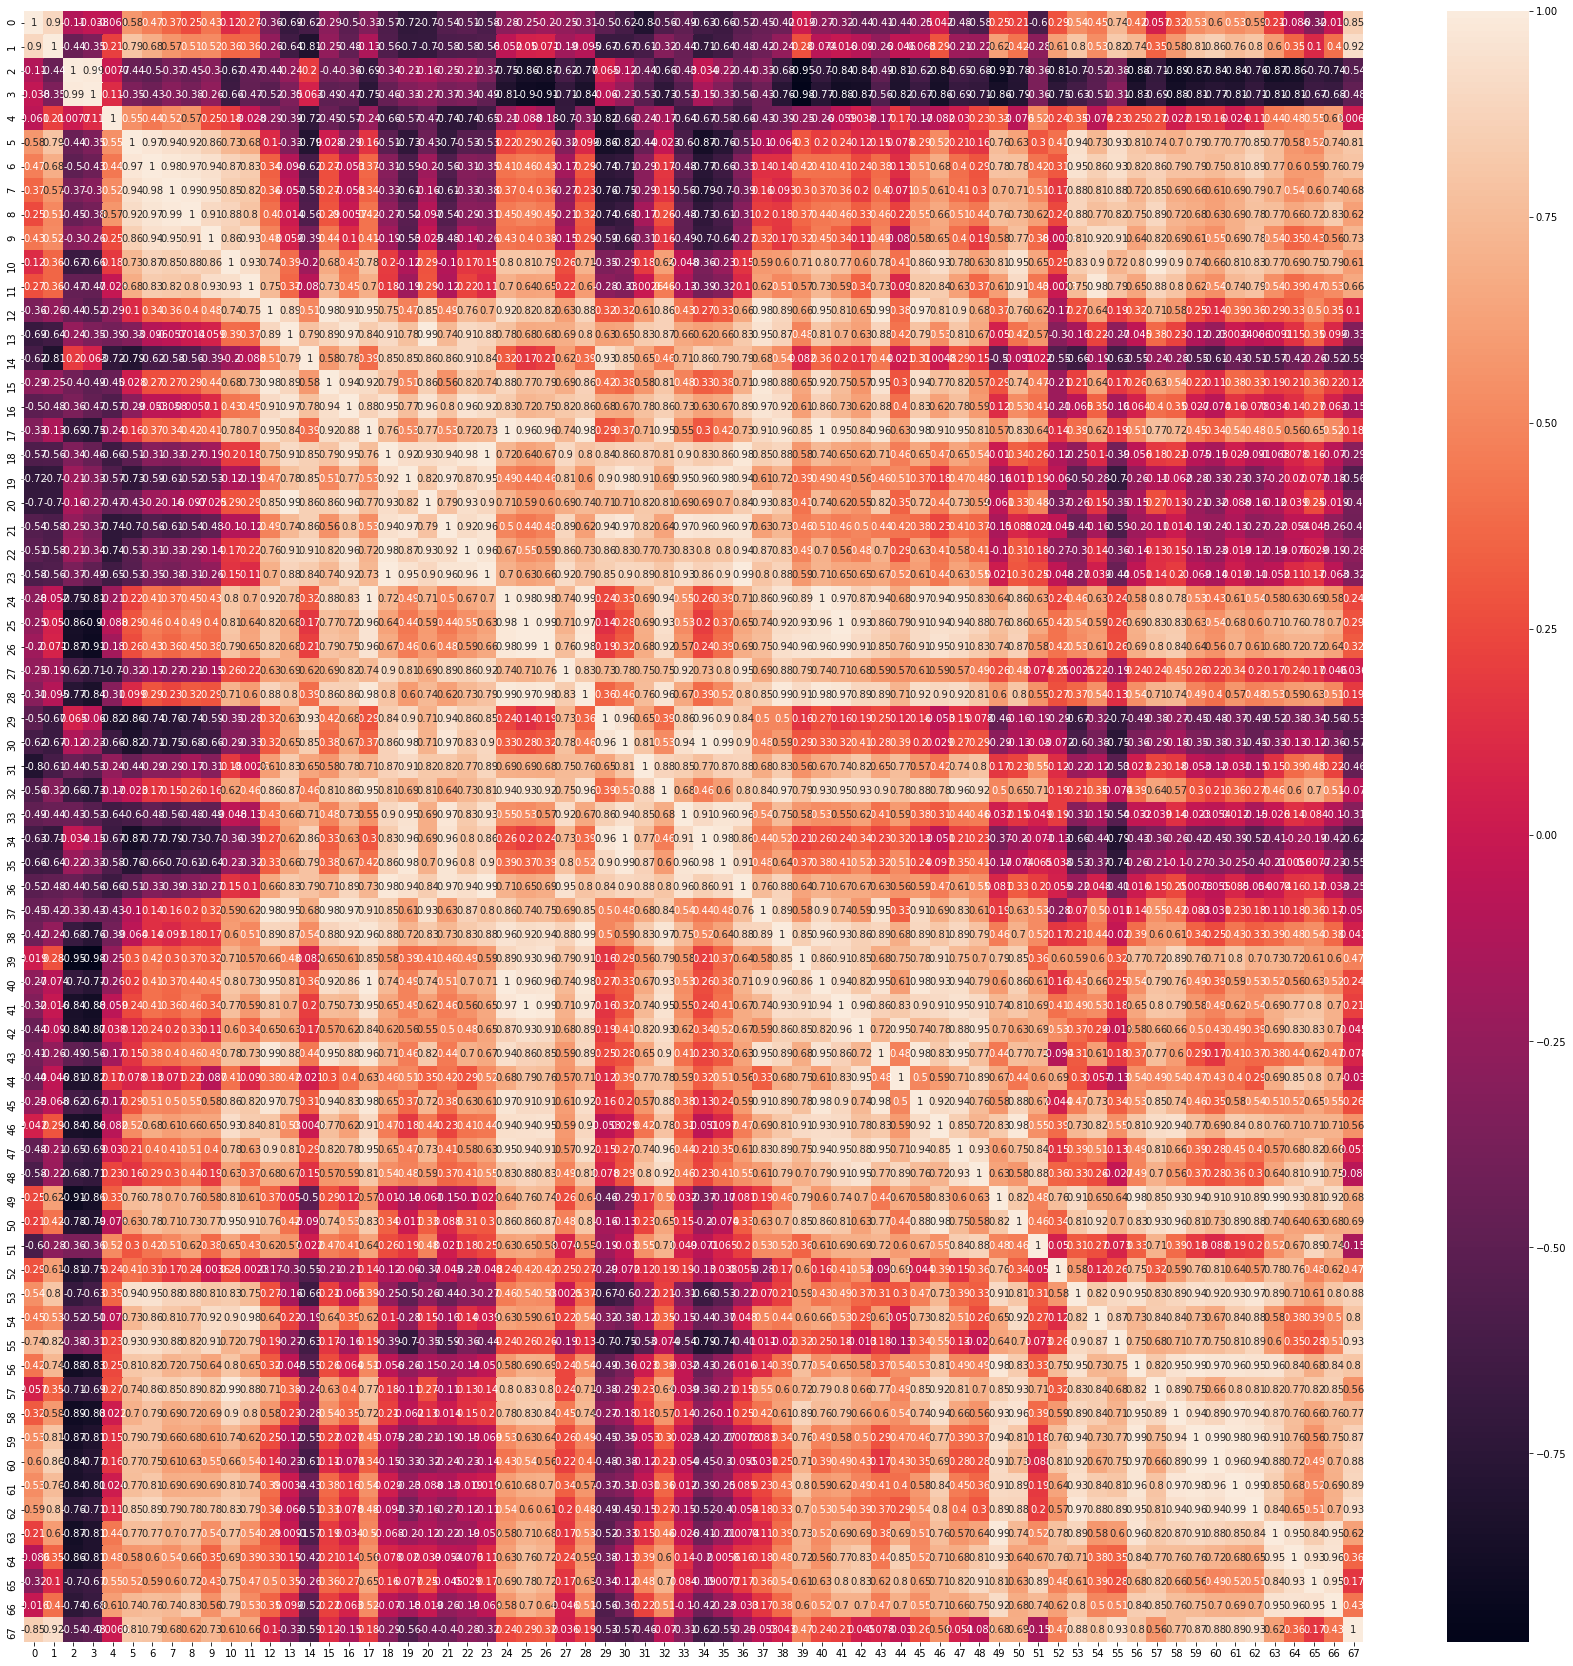

In [19]:
corrMatrix = parameters_for_each_base.corr()


fig, ax = plt.subplots(figsize=(30,30))
sn.heatmap(corrMatrix, annot=True, ax=ax)
plt.show()

## One-hot encoding

In [28]:
list(train_df.columns)

['id',
 'sequence',
 'structure',
 'predicted_loop_type',
 'signal_to_noise',
 'SN_filter',
 'seq_length',
 'seq_scored',
 'reactivity_error',
 'deg_error_Mg_pH10',
 'deg_error_pH10',
 'deg_error_Mg_50C',
 'deg_error_50C',
 'reactivity',
 'deg_Mg_pH10',
 'deg_pH10',
 'deg_Mg_50C',
 'deg_50C',
 'deg_pH10_mean',
 'deg_Mg_pH10_mean',
 'deg_50C_mean',
 'deg_Mg_50C_mean',
 'reactivity_mean']

In [29]:
window_width=61

In [30]:
# Vect_df[[0]]

In [31]:
def is_base(base, ref_base):
    if base==ref_base:
        return 1
    else:
        return 0

In [32]:
input_line_names=[
    'seq_is_A','seq_is_U','seq_is_C','seq_is_G',
    'struc_is_open_parenthesis','struc_is_close_parenthesis','struc_is_dot',
    'loop_is_S','loop_is_M','loop_is_I','loop_is_B','loop_is_H','loop_is_E','loop_is_X'
                  ]

# len(input_line_names)

col=list(range(68))
# Vect_df=pd.DataFrame(columns=col, index=input_line_names)

In [33]:
Vectors_list_X=[]
for item in range(len(train_df)): # each item corresponds to a different sequence
#     print(item)
    row=train_df.iloc[item]
    Vect_df=pd.DataFrame(columns=col, index=input_line_names)
#     print(row['sequence'])
#     print(row['structure'])
#     print(row['predicted_loop_type'])
    for base in range(68):
        AA=row['sequence'][base]
#         print(AA)
#         print(base)
        Vect_df[base]['seq_is_A']=is_base(AA,'A')
        Vect_df[base]['seq_is_U']=is_base(AA,'U')
        Vect_df[base]['seq_is_C']=is_base(AA,'C')
        Vect_df[base]['seq_is_G']=is_base(AA,'G')
        
        Struc=row['structure'][base]
        Vect_df[base]['struc_is_open_parenthesis']=is_base(Struc,'(')
        Vect_df[base]['struc_is_close_parenthesis']=is_base(Struc,')')
        Vect_df[base]['struc_is_dot']=is_base(Struc,'.')
        
        loop=row['predicted_loop_type'][base]
        Vect_df[base]['loop_is_S']=is_base(loop,'S')
        Vect_df[base]['loop_is_M']=is_base(loop,'M')
        Vect_df[base]['loop_is_I']=is_base(loop,'I')
        Vect_df[base]['loop_is_B']=is_base(loop,'B')
        Vect_df[base]['loop_is_H']=is_base(loop,'H')
        Vect_df[base]['loop_is_E']=is_base(loop,'E')
        Vect_df[base]['loop_is_X']=is_base(loop,'X')
                
    Vectors_list_X.append(Vect_df.transpose().to_numpy())
    
# print(Vectors_list)

In [34]:
Vectors_list_Y=[]
col=list(range(68))
output_line_names=['reactivity','deg_Mg_pH10','deg_Mg_50C']
for item in range(len(train_df)):
    row=train_df.iloc[item]
    Vect_df=pd.DataFrame(columns=col, index=output_line_names)
    for base in range(68):
        Vect_df[base]['reactivity']=row['reactivity'][base]
        Vect_df[base]['deg_Mg_pH10']=row['deg_Mg_pH10'][base]
        Vect_df[base]['deg_Mg_50C']=row['deg_Mg_50C'][base]

    Vectors_list_Y.append(Vect_df.transpose().to_numpy())

In [35]:
Vectors_array_X=np.array(Vectors_list_X) #chaque ligne est une base, chaque colonne est une caractéristique

Vectors_array_Y=np.array(Vectors_list_Y) #chaque ligne est une base, chaque colonne est une caractéristique

In [73]:
print(np.shape(Vectors_array_Y))

(2400, 68, 3)


## Removal of too-low S/N ratio

In [70]:
# train_df['signal_to_noise'].head(10)

In [71]:
# train_select_df=train_df.loc[train_df['signal_to_noise']>=3]
# train_select_df.head(10)

## Separation of the data between train and test

In [37]:
Vectors_list_X[0]

array([[0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0],
       [0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0],
       [1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0],
       [1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0],
       [1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0],
       [1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0],
       [0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0],
       [0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0],
       [0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0],
       [0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0],
       [1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0],
       [0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0],
       [1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0],
       [1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0],
       [0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0],
       [1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0],
       [0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 1, 0, 1, 0, 1,

In [38]:
from sklearn.model_selection import train_test_split

seed = 123
X_train, X_test, Y_train, Y_test = train_test_split(Vectors_array_X, Vectors_array_Y, test_size = 0.1, random_state = seed)

In [39]:
(len(X_train),len(X_test))

(2160, 240)

In [40]:
(len(Y_train),len(Y_test))

(2160, 240)

In [41]:
print(len(X_train))

2160


In [42]:
print(np.size(X_train[0]))
print(len(X_train[0]))
print(len(X_train[0][1]))
print(X_train[0])

952
68
14
[[0 0 0 1 0 0 1 0 0 0 0 0 1 0]
 [0 0 0 1 0 0 1 0 0 0 0 0 1 0]
 [1 0 0 0 0 0 1 0 0 0 0 0 1 0]
 [1 0 0 0 0 0 1 0 0 0 0 0 1 0]
 [1 0 0 0 0 0 1 0 0 0 0 0 1 0]
 [0 0 0 1 1 0 0 1 0 0 0 0 0 0]
 [0 1 0 0 1 0 0 1 0 0 0 0 0 0]
 [0 1 0 0 0 0 1 0 0 1 0 0 0 0]
 [0 0 1 0 1 0 0 1 0 0 0 0 0 0]
 [0 0 0 1 0 0 1 0 0 1 0 0 0 0]
 [1 0 0 0 0 0 1 0 0 1 0 0 0 0]
 [1 0 0 0 0 0 1 0 0 1 0 0 0 0]
 [1 0 0 0 0 0 1 0 0 1 0 0 0 0]
 [1 0 0 0 0 0 1 0 0 1 0 0 0 0]
 [0 0 1 0 1 0 0 1 0 0 0 0 0 0]
 [0 0 0 1 1 0 0 1 0 0 0 0 0 0]
 [0 0 0 1 0 0 1 0 0 1 0 0 0 0]
 [1 0 0 0 0 0 1 0 0 1 0 0 0 0]
 [1 0 0 0 0 0 1 0 0 1 0 0 0 0]
 [1 0 0 0 0 0 1 0 0 1 0 0 0 0]
 [0 0 1 0 1 0 0 1 0 0 0 0 0 0]
 [0 0 1 0 1 0 0 1 0 0 0 0 0 0]
 [0 0 0 1 0 0 1 0 0 1 0 0 0 0]
 [1 0 0 0 0 0 1 0 0 1 0 0 0 0]
 [1 0 0 0 0 0 1 0 0 1 0 0 0 0]
 [0 0 1 0 1 0 0 1 0 0 0 0 0 0]
 [0 0 1 0 1 0 0 1 0 0 0 0 0 0]
 [0 0 0 1 0 0 1 0 0 1 0 0 0 0]
 [1 0 0 0 0 0 1 0 0 1 0 0 0 0]
 [0 0 1 0 1 0 0 1 0 0 0 0 0 0]
 [0 0 0 1 1 0 0 1 0 0 0 0 0 0]
 [0 0 0 1 0 0 1 0 0 1 0 0 0 0

In [78]:
#mode fenêtré:
window_size=21 #doit être un nombre impair
print(len(X_train))
for i in range(68): #on parcourt toute la séquence
    test_input, test_output = window_training(i, 68, X_train, Y_train, X_test, Y_test)
    #ici il faut faire le fit sur le full_array de dimensions 2160*21*14=nombredeséquences*window_size*nombredeparamètresd'input
    #ensuite on lance le modèle sur les vraies données, 
    #et on stocke le résultat [a,b,c] dans l'item i une liste du type [[1, 0, 0], [0, 1, 0.3], [0.4, 0.7, 1], ...], de dimensions 68*3

#à la fin on a une liste de 68 triplets (68*3)

2160
[[0.8048000000000001 0.3589 0.9599000000000001]
 [0.3683 0.38 0.4617]
 [0.3738 0.5503 0.5031]
 ...
 [0.6003000000000001 0.5622 0.3568]
 [0.4693 0.38370000000000004 0.049800000000000004]
 [0.6197 0.6246 0.5262]]
(2160, 3)


In [ ]:
def prepare_window_training(base_index, n_bases,X_train, Y_train, X_test, Y_test):
    start_index=int(i-(window_size-1)/2)
    stop_index=int(i+(window_size-1)/2 +1) #not included
    full_array=[]
    for sample_index in range(len(X_train)):
        sample_array=X_train[sample_index]

        if start_index<0:
            out_array=np.array([[-1]*len(sample_array[0])]*(-int(start_index)))
            studied_cut_array=sample_array[0:stop_index]
            studied_array=np.concatenate((out_array,studied_cut_array))

        elif stop_index>68:
            out_array=np.array([[-1]*len(sample_array[0])]*(int(stop_index-68)))
            studied_cut_array=sample_array[start_index:68]
            studied_array=np.concatenate((studied_cut_array,out_array))

        else :
            studied_array=sample_array[start_index:stop_index]
        full_array.append(studied_array)

    full_array=np.array(full_array)
    output=Y_train[:,i,:]
    return full_array, output
    
    #ici il faut faire le fit sur le full_array de dimensions 2160*21*14=nombredeséquences*window_size*nombredeparamètresd'input
    #ensuite on lance le modèle sur les vraies données, 
    #et on stocke le résultat [a,b,c] dans l'item i une liste du type [[1, 0, 0], [0, 1, 0.3], [0.4, 0.7, 1], ...], de dimensions 68*3
